In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Loading

In [2]:
data=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\Intership\\Task 1\\OnlineRetail.csv",encoding="latin1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Basic Data Understanding

In [3]:
print(f"Shape of the Dataset:\n{data.shape}\n")
print(f"Missing Value in Dataset:\n{data.isnull().sum()}\n")
print(f"Basic Info of the Dataset:\n{data.info()}")

Shape of the Dataset:
(541909, 8)

Missing Value in Dataset:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
Basic Info of the Dataset:
None


In [4]:
data.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [5]:
numeric_features=data.select_dtypes(include=['int64','float64']).columns
print(f'Number of numeric features :{len(numeric_features)}\n Numeric Featuers:{list(numeric_features)}')
object_features=data.select_dtypes(include=['object']).columns
print(f'Number of object features :{len(object_features)}\n Object Featuers:{list(object_features)}')

Number of numeric features :3
 Numeric Featuers:['Quantity', 'UnitPrice', 'CustomerID']
Number of object features :5
 Object Featuers:['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']


# Data Handling

In [6]:
Null_values=data.isnull().sum()
Total_rows=data.shape[0]
print(f'To Check Proportional of Null Values:\n{round((Null_values/Total_rows)*100,3)}')

To Check Proportional of Null Values:
InvoiceNo       0.000
StockCode       0.000
Description     0.268
Quantity        0.000
InvoiceDate     0.000
UnitPrice       0.000
CustomerID     24.927
Country         0.000
dtype: float64


In [7]:
data = data.dropna(subset=['Description'])
data = data.drop(columns=['InvoiceNo'])
print(f'Now The Shape of Dataset is :\n{data.shape}')

Now The Shape of Dataset is :
(540455, 7)


In [8]:
data['Invoice_Date_Time'] = pd.to_datetime(data['InvoiceDate'])
data=data.drop(['InvoiceDate'],axis='columns')
data.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date_Time
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [9]:
neg_or_zero_up=data[(data['UnitPrice']<0)|(data['UnitPrice']==0)]
data=data[data['UnitPrice']>0]
print(f'Number of Negative and Zero Rows in UnitPrice:{len(neg_or_zero_up)}')
print(f'After this shape of the dataset:{data.shape}')

Number of Negative and Zero Rows in UnitPrice:1063
After this shape of the dataset:(539392, 7)


In [10]:
data['StockCode'] = data['StockCode'].str.upper().str.strip()
no_product=data[data['StockCode'].isin(['Post','DOT','C2','M','BANK CHARGES'])]
print(f'Total Number of no product Rows is :{len(no_product)}')
data=data[~data['StockCode'].isin(['Post','DOT','C2','M','BANK CHARGES'])]
print(f'After filteration the shape looks like:{data.shape}')

Total Number of no product Rows is :1453
After filteration the shape looks like:(537939, 7)


# Descriptive Statistics

In [11]:
print(f"Mean value of UnitPrice: {round(data['UnitPrice'].mean(),3)}")
print(f"Median value of UnitPrice: {round(data['UnitPrice'].median(),3)}")
print(f"Mode of UnitPrice: {round(data['UnitPrice'].mode()[0], 3)}")
print(f"Standard Deviation of UnitPrice: {round(data['UnitPrice'].std(),3)}")

Mean value of UnitPrice: 3.877
Median value of UnitPrice: 2.08
Mode of UnitPrice: 1.25
Standard Deviation of UnitPrice: 72.212


In [12]:
print(f"Mean value of Quantity: {round(data['Quantity'].mean(),3)}")
print(f"Median value of Quantity: {round(data['Quantity'].median(),3)}")
print(f"Mode of Quantity: {round(data['Quantity'].mode()[0], 3)}")
print(f"Standard Deviation of Quantity: {round(data['Quantity'].std(),3)}")

Mean value of Quantity: 9.865
Median value of Quantity: 3.0
Mode of Quantity: 1
Standard Deviation of Quantity: 215.667


Text(0.5, 0, 'Countries')

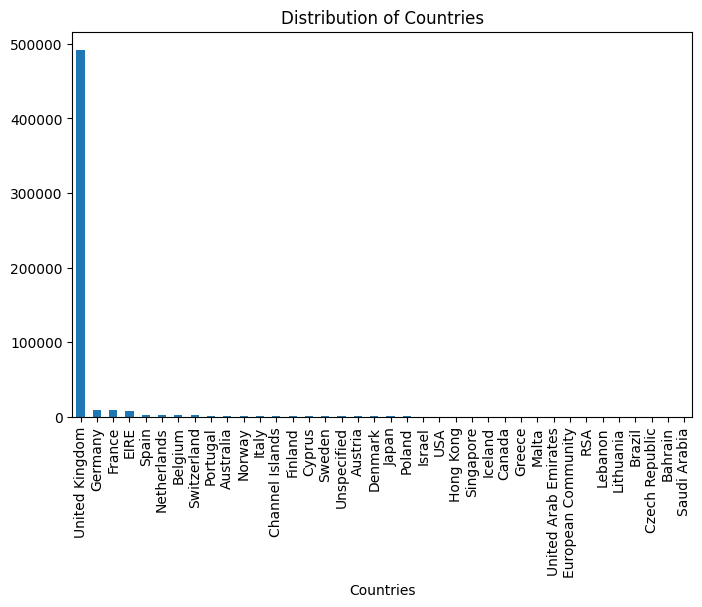

In [13]:
plt.figure(figsize=(8,5))
data['Country'].value_counts().plot(kind='bar')
plt.title("Distribution of Countries")
plt.xlabel("Countries")

# Feature Engineering

In [14]:
data['Total_Price']=data['Quantity']*data['UnitPrice']
data['Month']=data['Invoice_Date_Time'].dt.month
data['Hours']=data['Invoice_Date_Time'].dt.hour

# Key Business Insights

In [15]:
customer_sales = data.groupby('CustomerID').agg(
    Total_Sales=('Total_Price', 'sum')
).reset_index()
customer_sales=customer_sales.sort_values(by='Total_Sales',ascending=False)
top_ten_customer_sales=customer_sales.head(10)

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_14380\3857244861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=top_ten_customer_sales,


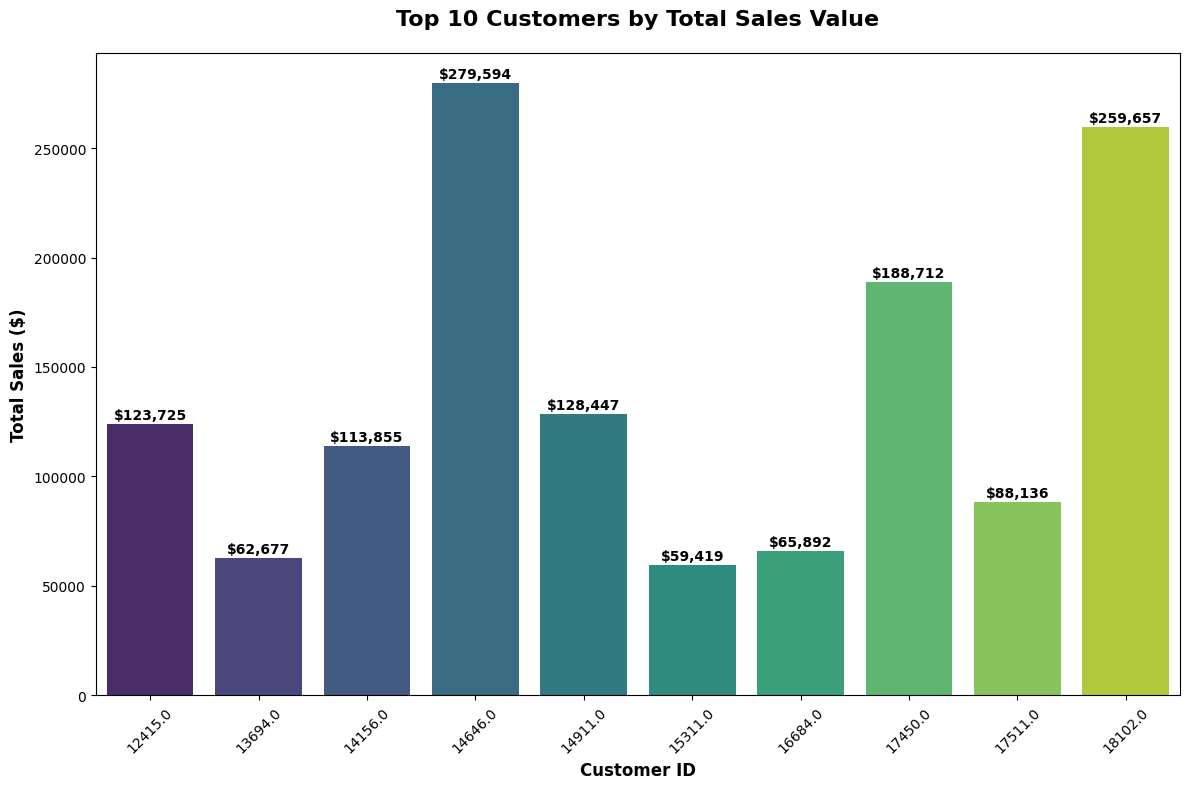

In [16]:
plt.figure(figsize=(12, 8)) 
plot=sns.barplot(data=top_ten_customer_sales, 
                 x='CustomerID', 
                 y='Total_Sales', 
                 palette='viridis')
for p in plot.patches:
    count=int(p.get_height())
    plot.annotate(f'${count:,.0f}',(p.get_x()+p.get_width()/2,p.get_height()+1000),ha='center',va='bottom',
                 fontweight='bold',fontsize=10)
plt.title('Top 10 Customers by Total Sales Value', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Customer ID', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

In [17]:
Product_Sales = data.groupby('Description').agg(
    Total_Sales=('Total_Price', 'sum')
).reset_index()
Product_Sales=Product_Sales.sort_values(by='Total_Sales',ascending=False)
top_ten_Product_Sales=Product_Sales.head(10)

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_14380\704539771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=top_ten_Product_Sales,


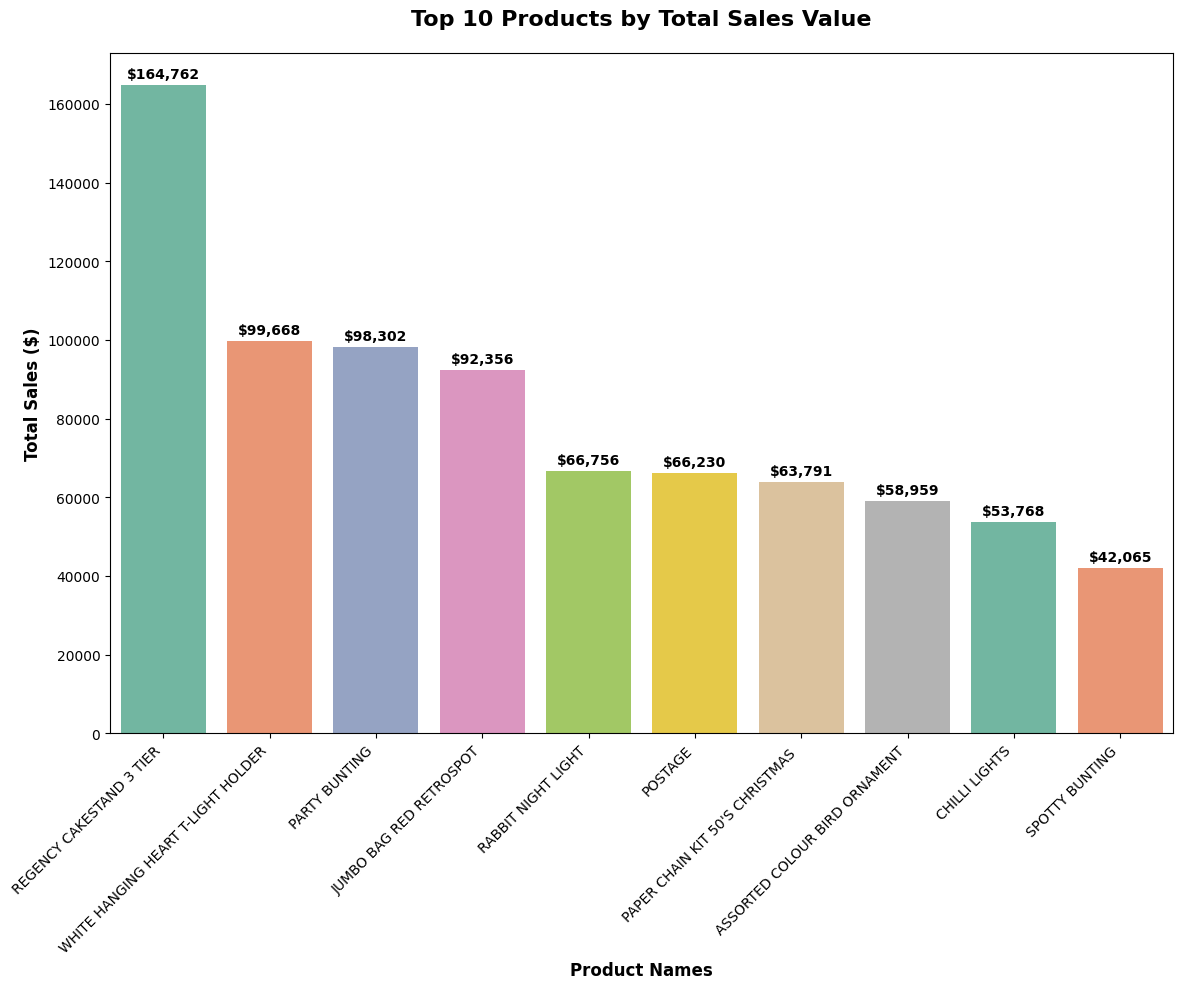

In [18]:
plt.figure(figsize=(12, 10)) 
plot=sns.barplot(data=top_ten_Product_Sales, 
                 x='Description', 
                 y='Total_Sales', 
                 palette='Set2')
for p in plot.patches:
    count=int(p.get_height())
    plot.annotate(f'${count:,.0f}', 
                 (p.get_x() + p.get_width() / 2, count + 1000),
                 ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.title('Top 10 Products by Total Sales Value', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Product Names', fontsize=12, fontweight='bold',ha='center')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [19]:
Monthly_Sales = data.groupby('Month').agg(
    Total_Sales=('Total_Price', 'sum')
).reset_index()

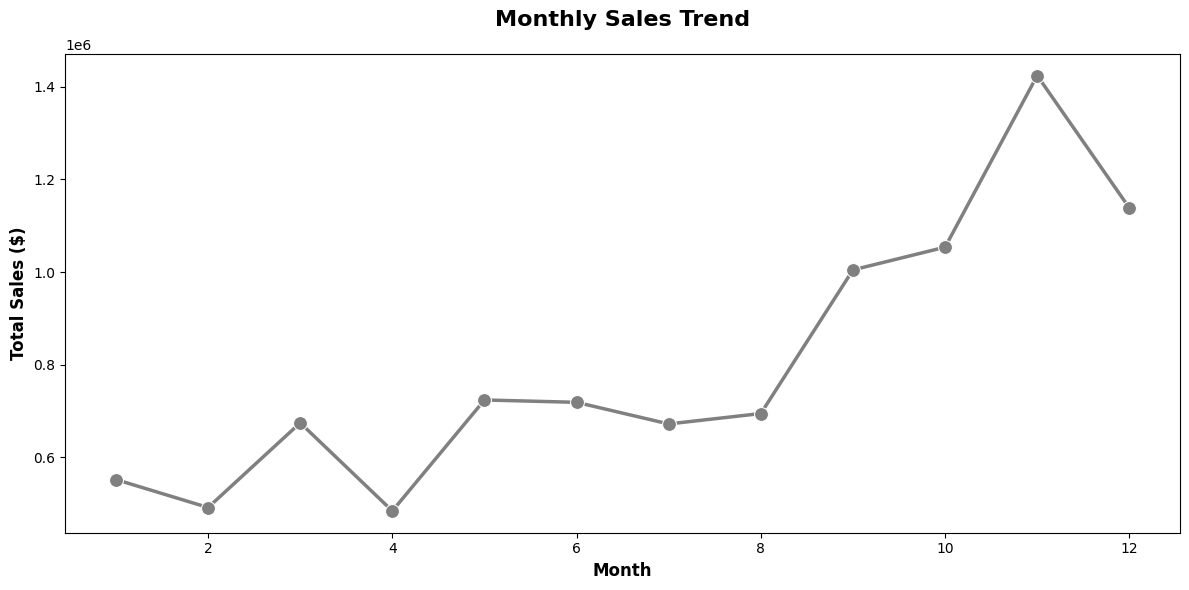

In [20]:
plt.figure(figsize=(12, 6))

# Create line plot with markers
sns.lineplot(data=Monthly_Sales, x='Month', y='Total_Sales', 
             marker='o',            
             markersize=10,         
             linewidth=2.5,        
             color='grey')     

plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [21]:
peak_hours = data.groupby("Hours").agg(
    Total_Sales=("Total_Price", "sum")
).reset_index().sort_values(by="Total_Sales", ascending=False)

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_14380\2718096932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=peak_hours,


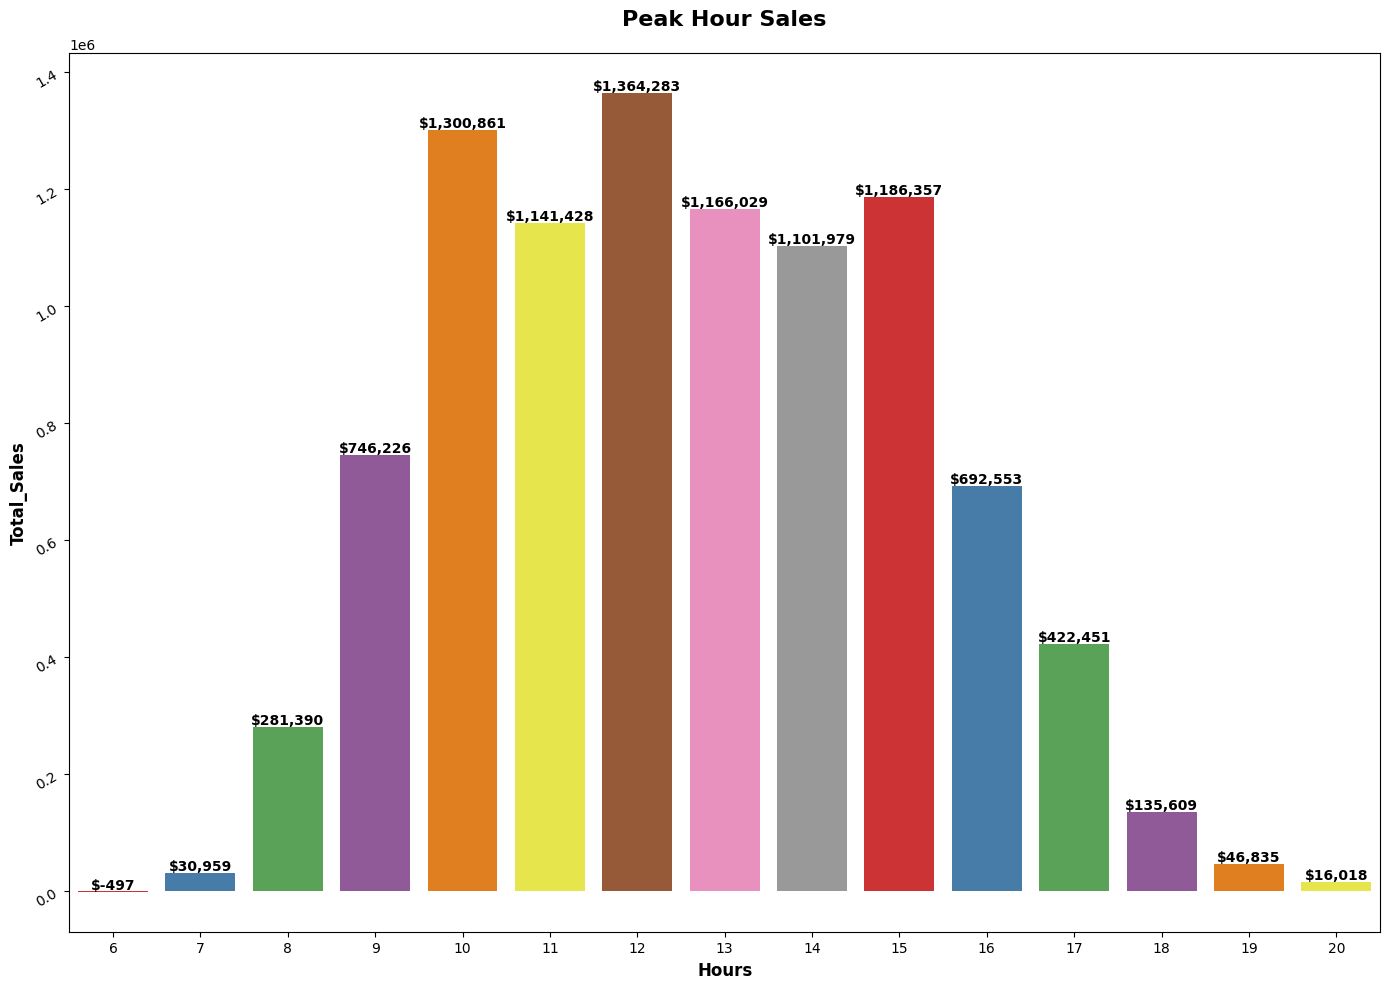

In [22]:
plt.figure(figsize=(14, 10)) 
plot = sns.barplot(data=peak_hours, 
                 y='Total_Sales',  
                 x='Hours',        
                 palette='Set1')      
for p in plot.patches:
    count = p.get_height()  
    plot.annotate(f'${int(count):,.0f}',  
                 (p.get_x() + p.get_width() / 2, count + 1),
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('Peak Hour Sales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hours', fontsize=12, fontweight='bold')
plt.ylabel('Total_Sales', fontsize=12, fontweight='bold')  
plt.yticks(rotation=30)
plt.tight_layout()

In [23]:
Trending_Product = data.groupby('Description').agg(
    Month=('Month', lambda x:x.mode()[0])
).reset_index()

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_14380\1464859921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=Trending_Product.head(20),


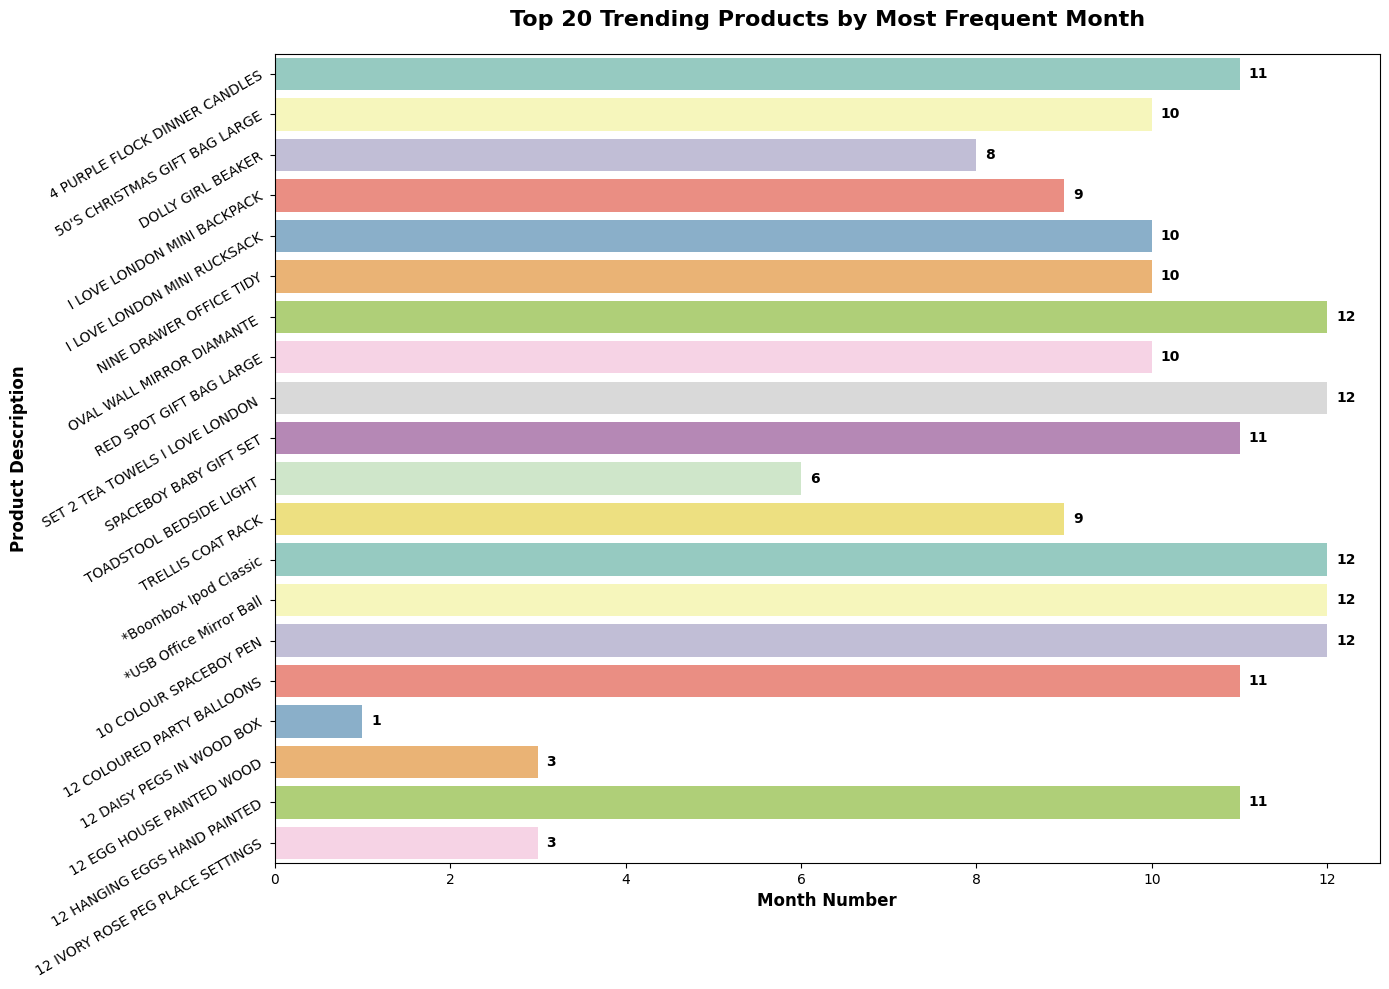

In [24]:
plt.figure(figsize=(14, 10)) 
plot = sns.barplot(data=Trending_Product.head(20), 
                 y='Description',  
                 x='Month',        
                 palette='Set3',
                 orient='h')      
for p in plot.patches:
    width = p.get_width()  
    plot.annotate(int(width),  
                 (width + 0.1, p.get_y() + p.get_height()/2), 
                 ha='left', va='center', fontweight='bold', fontsize=10)

plt.title('Top 20 Trending Products by Most Frequent Month', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month Number', fontsize=12, fontweight='bold')
plt.ylabel('Product Description', fontsize=12, fontweight='bold')  
plt.yticks(rotation=30)
plt.tight_layout()


In [25]:
sales_by_country = data.groupby("Country").agg(
    Total_Sales=("Total_Price", "sum")
).reset_index().sort_values(by="Total_Sales", ascending=False)
top_ten_sales_by_country=sales_by_country.head(10)

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_14380\1687579128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=top_ten_sales_by_country,


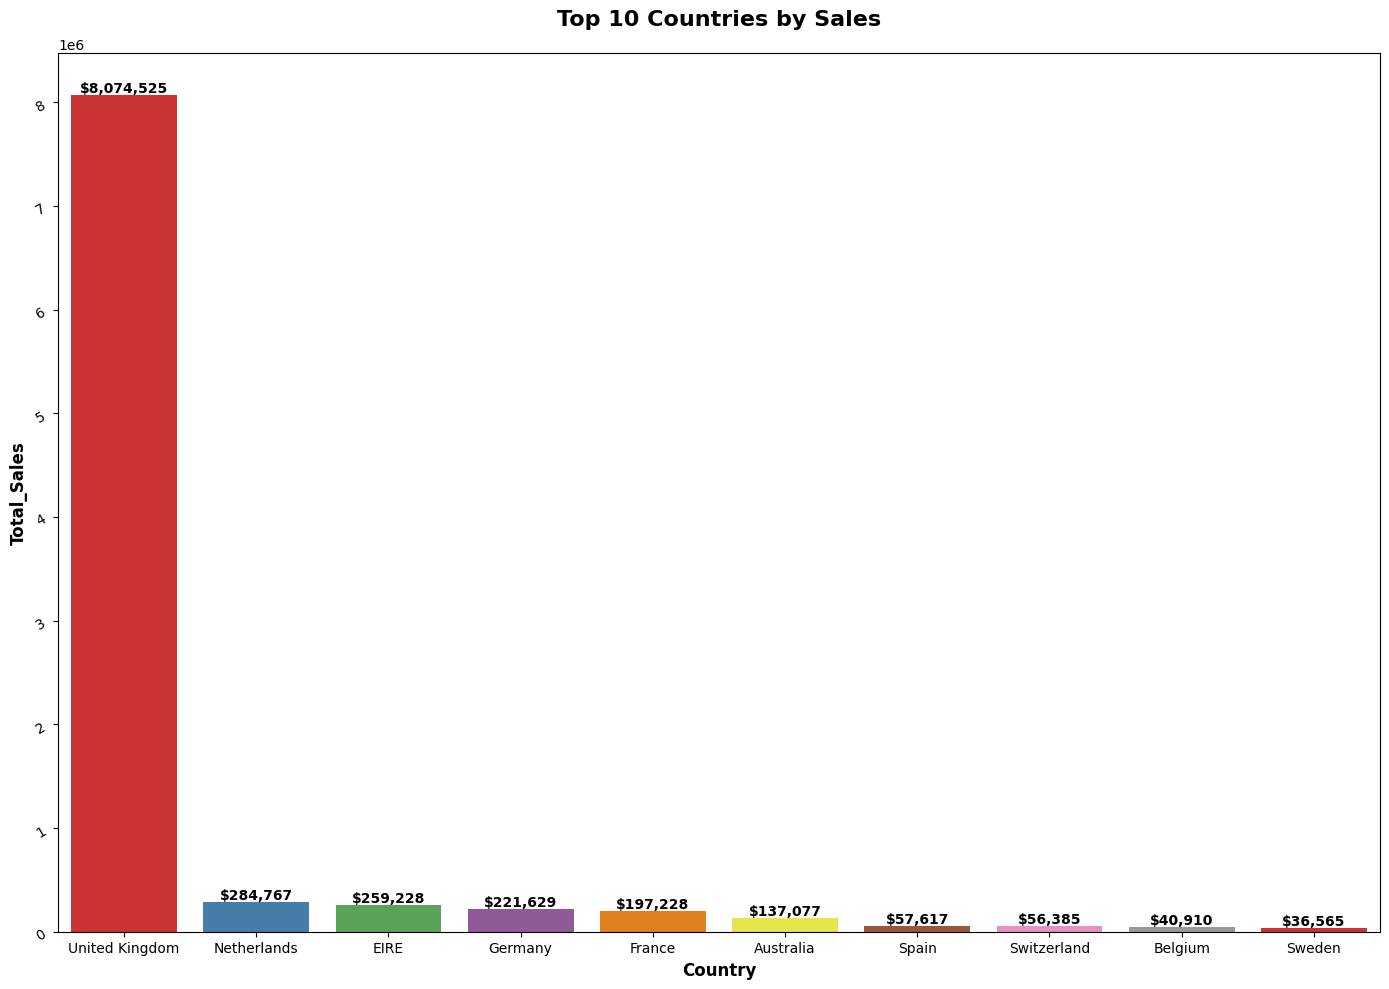

In [26]:
plt.figure(figsize=(14, 10)) 
plot = sns.barplot(data=top_ten_sales_by_country, 
                 y='Total_Sales',  
                 x='Country',        
                 palette='Set1')      
for p in plot.patches:
    count = p.get_height()  
    plot.annotate(f'${int(count):,.0f}',  
                 (p.get_x() + p.get_width() / 2, count + 1),
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('Top 10 Countries by Sales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Total_Sales', fontsize=12, fontweight='bold')  
plt.yticks(rotation=30)
plt.tight_layout()

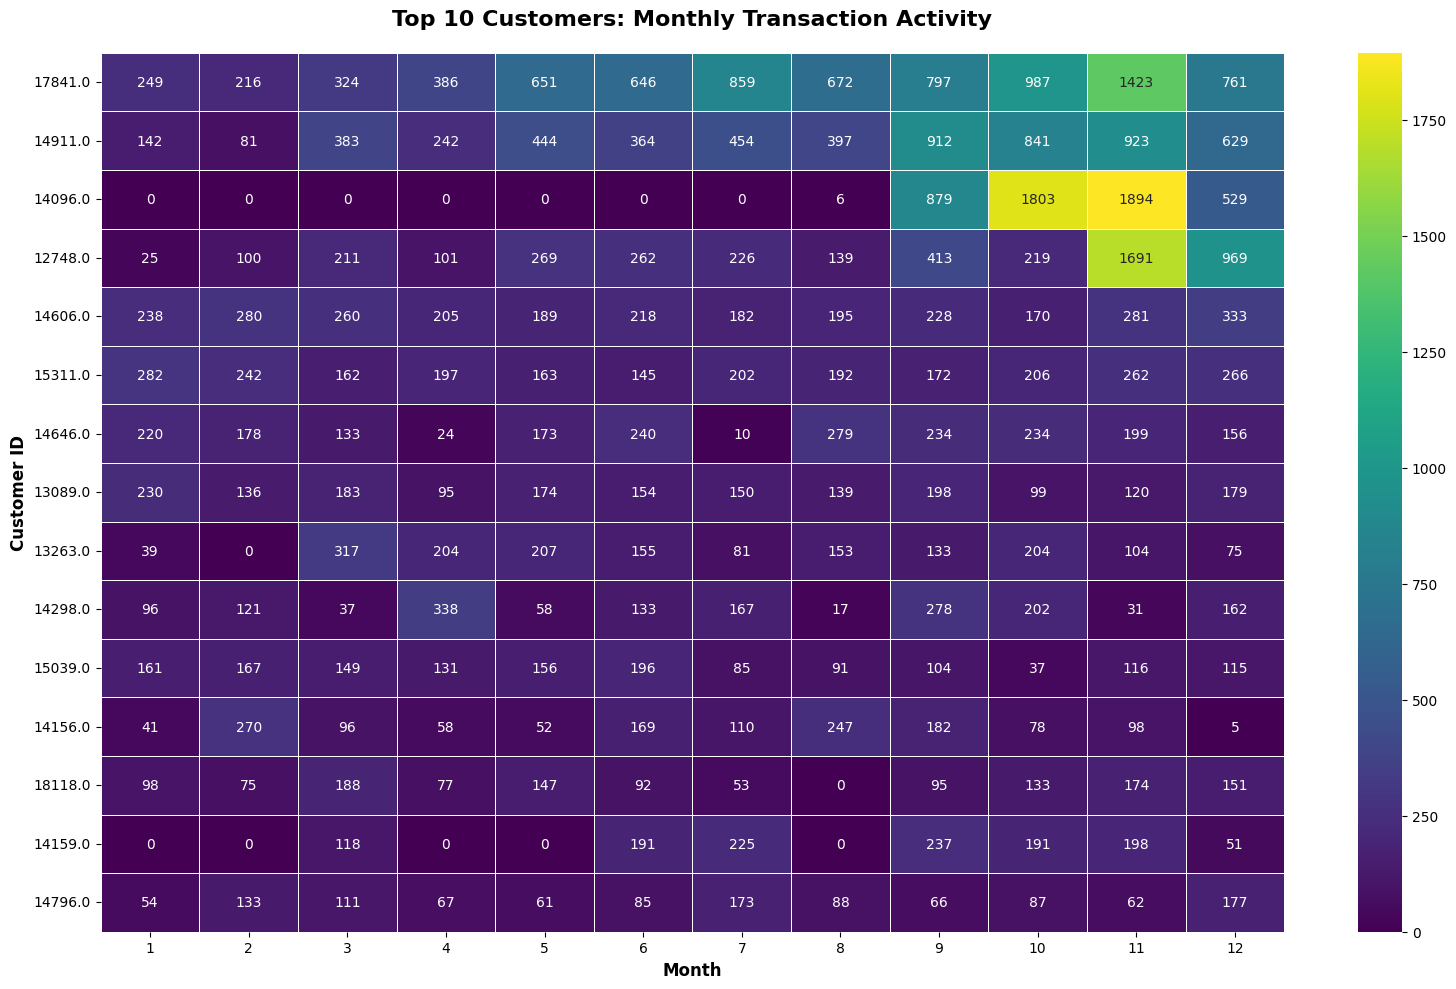

In [27]:
customer_retention = data.pivot_table(
    index='CustomerID', 
    columns='Month', 
    values='Total_Price', 
    aggfunc='count', 
    fill_value=0
)
plt.figure(figsize=(16, 10))
top_customers = customer_retention.sum(axis=1).nlargest(15).index
customer_retention_top = customer_retention.loc[top_customers]
sns.heatmap(customer_retention_top, cmap='viridis', annot=True, fmt='d',linewidths=0.5)
plt.title('Top 10 Customers: Monthly Transaction Activity',fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Customer ID', fontsize=12, fontweight='bold')
plt.tight_layout()

In [28]:
compact_data=data.drop(['StockCode','Quantity','CustomerID','UnitPrice','Invoice_Date_Time'],axis='columns')
compact_data.to_csv("C:\\UMAR DATA\\Data Sciences\\Intership\\Task 1\\processed_retail_data.csv", index=False)